In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

In [15]:
file = r'D:\data\QudiData\2020\04\20200407\PulsedMeasurement\20200407-0942-42_hahn echo_pulsed_measurement.dat'

In [16]:
names = ['time','signal1','signal2']
df= pd.read_csv(file,skiprows = 17, delimiter= '\t',names = names)
# del df['aa']
# del df['bb']
df.head()

       time  signal1  signal2
0  0.000001   98.445   89.925
1  0.000006   99.555   90.700
2  0.000011   99.755   89.225
3  0.000016   99.800   90.115
4  0.000021   99.090   90.505

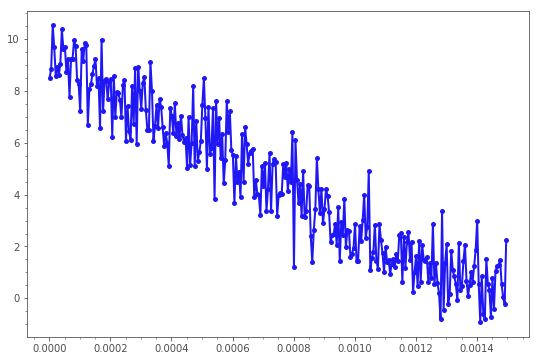

In [21]:
plt.plot(df['time'],df['signal1'] - df['signal2'] )
plt.show()

In [54]:
def fit_func (x,a,tau,N):
    return a * np.exp( -(x/tau)**N  ) 
#     return -a*(x-x0)**2 + c

def noise_func (x,a,c):
    return a*x +c

x_data = df['time']
y_data = df['signal1']- df['signal2']

params, params_covariance = optimize.curve_fit(fit_func, x_data, y_data,p0=[10,5e-3,1])#,maxfev =20000)#,bounds = bounds)

[8.76317636 0.00088561 1.85961996]


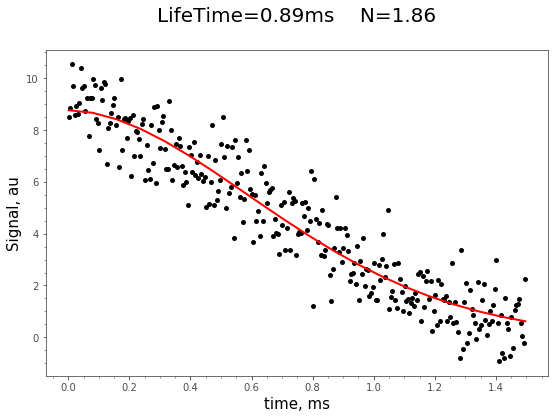

In [55]:
print(params)
plt.plot(x_data*1e3,y_data,'o',color='black',label = 'data')
t = np.linspace(min(x_data),max(x_data),20)
plt.plot(t*1e3, fit_func(t,*params),'r-',label = 'fit')

# plt.plot(x, noise_func(x,params[-2],params[-1]),label = 'noise',color = 'black')
title = 'LifeTime=' + str(np.round(params[1]*1e3,2))+  'ms    N=' + str(np.round(params[2],2)) + '\n'
plt.title(title, fontsize = 20)
plt.ylabel('Signal, au', fontsize = 15)
plt.xlabel('time, ms', fontsize = 15)
# plt.legend()
# plt.savefig('sat curve 27.02.png')
plt.show()

In [32]:
print(params)


[8.76318855 0.00088561 1.85961109]
